In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('./datas_FinBERT.csv')
# 首先将日期转换为 datetime 类型，并设置为索引
data['times'] = pd.to_datetime(data['times'])
data.set_index('times', inplace=True)
print(data.head())
data.info()

            Unnamed: 0                                   sentiment_scores
times                                                                    
2006-10-20           0                             [-0.15854748384033462]
2006-10-21           1                                              [0.0]
2006-10-23           2                         [-0.6818488136581753, 0.0]
2006-10-24           3  [-0.4595161032676697, -0.813238263130188, 0.87...
2006-10-25           4         [-0.7924697727853367, -0.5260841946532256]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1277 entries, 2006-10-20 to 2012-02-29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1277 non-null   int64 
 1   sentiment_scores  1277 non-null   object
dtypes: int64(1), object(1)
memory usage: 29.9+ KB


In [43]:
import ast
data['sentiment_scores'] = data['sentiment_scores'].apply(ast.literal_eval)

# 计算统计量
data['sentiment_score_avg'] = data['sentiment_scores'].apply(lambda x: sum(x) / len(x) if x else float('nan'))
# data['median'] = data['sentiment_scores'].apply(lambda x: pd.Series(x).median())
# data['max'] = data['sentiment_scores'].apply(lambda x: max(x) if x else float('nan'))
# data['min'] = data['sentiment_scores'].apply(lambda x: min(x) if x else float('nan'))
# data['std'] = data['sentiment_scores'].apply(lambda x: pd.Series(x).std())

data.head()  # 显示前几行以检查结果

,Unnamed: 0,sentiment_scores,sentiment_score_avg
times,,,
2006-10-20,0,[-0.15854748384033462],-0.158547
2006-10-21,1,[0.0],0.000000
2006-10-23,2,"[-0.6818488136581753, 0.0]",-0.340924
2006-10-24,3,"[-0.4595161032676697, -0.813238263130188, 0.87...",-0.018280
2006-10-25,4,"[-0.7924697727853367, -0.5260841946532256]",-0.659277


In [44]:
# 计算滑动平均值和滑动标准差（7天窗口）
# window_size = 7
# data['rolling_mean'] = data['mean'].rolling(window=window_size).mean()
# data['rolling_std'] = data['mean'].rolling(window=window_size).std()
# 计算变化率（相对于前一天）
# data['change_rate'] = data['mean'].pct_change()
# # 计算加权滑动平均（这里简单地使用线性加权）
# weights = [i for i in range(1, window_size + 1)]
# data['weighted_rolling_mean'] = data['mean'].rolling(window=window_size).apply(lambda x: np.dot(x, weights) / sum(weights), raw=True)
# 计算指数加权移动平均
# data['exp_rolling_mean'] = data['mean'].ewm(span=window_size, adjust=False).mean()
# data[['mean', 'rolling_mean', 'rolling_std', 'change_rate', 'weighted_rolling_mean', 'exp_rolling_mean']].head(10)  # 显示前几行以检查结果

In [45]:
# 定义一个函数来调整日期为每个季度的第一天
def adjust_quarter_start_dates(index):
    return pd.to_datetime(index.year.astype(str) + '-' + (3 * (index.quarter - 1) + 1).astype(str) + '-01')
# 按季度聚合情感得分的平均值
quarterly_sentiment = data['sentiment_score_avg'].resample('Q').mean()
# 应用函数来调整季度开始日期
quarterly_sentiment.index = adjust_quarter_start_dates(quarterly_sentiment.index)
# 显示调整后的数据
print(quarterly_sentiment.head())

times
2006-10-01   -0.064578
2007-01-01   -0.110535
2007-04-01   -0.047433
2007-07-01   -0.090699
2007-10-01   -0.202850
Name: sentiment_score_avg, dtype: float64


In [46]:
# 定义一个函数来调整日期为每个月的第一天
def adjust_month_start_dates(index):
    return pd.to_datetime(index.year.astype(str) + '-' + index.month.astype(str) + '-01')
monthly_sentiment = data['sentiment_score_avg'].resample('M').mean()
# 应用函数来调整月度开始日期
monthly_sentiment.index = adjust_month_start_dates(monthly_sentiment.index)
print(monthly_sentiment.head())

times
2006-10-01   -0.211936
2006-11-01    0.064701
2006-12-01   -0.146372
2007-01-01   -0.033709
2007-02-01   -0.012333
Name: sentiment_score_avg, dtype: float64


In [47]:
# Employment_Level.head()
labels = pd.read_csv("./monthly_merged_label.csv")
labels.head()

,observation_date,PAYEMS,CE16OV,INDPRO,CMRMT,PCEC96,W875RX1
0,1919-01-01,NaN,NaN,4.8665,NaN,NaN,NaN
1,1919-02-01,NaN,NaN,4.6514,NaN,NaN,NaN
2,1919-03-01,NaN,NaN,4.5170,NaN,NaN,NaN
3,1919-04-01,NaN,NaN,4.5976,NaN,NaN,NaN
4,1919-05-01,NaN,NaN,4.6245,NaN,NaN,NaN


In [48]:
# 确保日期列为 datetime 类型
labels['observation_date'] = pd.to_datetime(labels['observation_date'])
# 将 Employment_Level 的日期列设置为索引
labels.set_index('observation_date', inplace=True)
labels.head()

,PAYEMS,CE16OV,INDPRO,CMRMT,PCEC96,W875RX1
observation_date,,,,,,
1919-01-01,NaN,NaN,4.8665,NaN,NaN,NaN
1919-02-01,NaN,NaN,4.6514,NaN,NaN,NaN
1919-03-01,NaN,NaN,4.5170,NaN,NaN,NaN
1919-04-01,NaN,NaN,4.5976,NaN,NaN,NaN
1919-05-01,NaN,NaN,4.6245,NaN,NaN,NaN


In [49]:
# 合并情感得分数据和标签数据
combined_data = pd.concat([monthly_sentiment, labels], axis=1, join='inner')
# 检查合并后的数据
combined_data.head()

,sentiment_score_avg,PAYEMS,CE16OV,INDPRO,CMRMT,PCEC96,W875RX1
2006-10-01,-0.211936,136848.0,145314.0,99.1253,1214355.0,NaN,11562.6
2006-11-01,0.064701,137069.0,145534.0,99.0969,1215059.0,NaN,11624.9
2006-12-01,-0.146372,137253.0,145970.0,100.1122,1234494.0,NaN,11683.5
2007-01-01,-0.033709,137476.0,146028.0,99.7571,1226965.0,11181.0,11666.7
2007-02-01,-0.012333,137554.0,146057.0,100.7275,1234327.0,11178.2,11713.7


In [50]:
from sklearn.preprocessing import MinMaxScaler

# 初始化归一化器
scaler = MinMaxScaler()
# 将数据归一化
combined_data_scaled = scaler.fit_transform(combined_data)
# 将归一化后的数据转换回 DataFrame
combined_data_scaled = pd.DataFrame(combined_data_scaled, columns=combined_data.columns, index=combined_data.index)

# 显示归一化后的数据
print(combined_data_scaled.head())
print(len(combined_data_scaled))

            sentiment_score_avg    PAYEMS    CE16OV    INDPRO     CMRMT  \
2006-10-01             0.408858  0.821704  0.850734  0.821541  0.781072   
2006-11-01             0.870284  0.847109  0.876369  0.819924  0.784781   
2006-12-01             0.518218  0.868261  0.927173  0.877718  0.887157   
2007-01-01             0.706138  0.893896  0.933931  0.857505  0.847497   
2007-02-01             0.741793  0.902862  0.937311  0.912743  0.886277   

              PCEC96   W875RX1  
2006-10-01       NaN  0.493129  
2006-11-01       NaN  0.550975  
2006-12-01       NaN  0.605385  
2007-01-01  0.185916  0.589786  
2007-02-01  0.181310  0.633426  
65


In [51]:
# 检查训练集和测试集中是否有缺失值
print("combined_data_scaled  missing values:")
print(combined_data_scaled.isnull().sum())

combined_data_scaled  missing values:
sentiment_score_avg    2
PAYEMS                 0
CE16OV                 0
INDPRO                 0
CMRMT                  0
PCEC96                 3
W875RX1                0
dtype: int64


In [52]:
# 如果存在缺失值，可以选择使用列的平均值填充
combined_data_scaled.fillna(combined_data_scaled.mean(), inplace=True)

# 或者删除包含缺失值的行
# combined_data_scaled.dropna(inplace=True)

In [53]:
n_months = 12 # 时间窗口，滚动n个粒度
window_size = 6 # 计算滚动特征

In [54]:
# 假设您的原始数据集是 combined_data

# 计算统计特征
combined_data_scaled['max_value'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).max()
combined_data_scaled['min_value'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).min()
combined_data_scaled['std_dev'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).std()
combined_data_scaled['median'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).median()
combined_data_scaled['mean'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).mean()

# # 处理边缘情况，如NaN值
# combined_data_scaled.fillna(method='bfill', inplace=True)

def create_features_labels(data, n_months):
    X, y = [], []
    for i in range(n_months, len(data)):
        X.append(data.iloc[i-n_months:i][['sentiment_score_avg']].values.flatten())
        y.append(data['INDPRO'].iloc[i])  # 标签
    return np.array(X), np.array(y)

# 使用新的特征和标签创建函数
X, y = create_features_labels(combined_data_scaled, n_months)
# 样本数，特征数
print("shape of X:",X.shape,"shape of y:",y.shape)

shape of X: (53, 12) shape of y: (53,)


In [55]:
# 检查 X 和 y 中是否有缺失值 (NaN)
print("Training set missing values:")
print(np.isnan(X).sum())
print("\nTest set missing values:")
print(np.isnan(y).sum())

Training set missing values:
0

Test set missing values:
0


In [56]:
# 划分训练集和测试集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 合并 X 训练集和 X 测试集
X_combined = np.vstack((X_train, X_test))
# 合并真实标签
y_combined = np.concatenate((y_train, y_test))

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, r2

def model_evaluation(model,model_name,X_combined,y_combined):
    # 使用某个模型进行预测,nn_model,rf_model,lr_model
    predicted = model.predict(X_combined)
    # 将预测结果转换为一维数组方便绘图
    predicted = predicted.ravel()
    # 绘制真实值和预测值
    plt.figure(figsize=(10,6))
    plt.plot(y_combined, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title(f"{model_name} Prediction vs Actual")
    plt.xlabel("Observations")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

Linear Regression - MSE: 0.0802, RMSE: 0.2831, R2: -18.6683


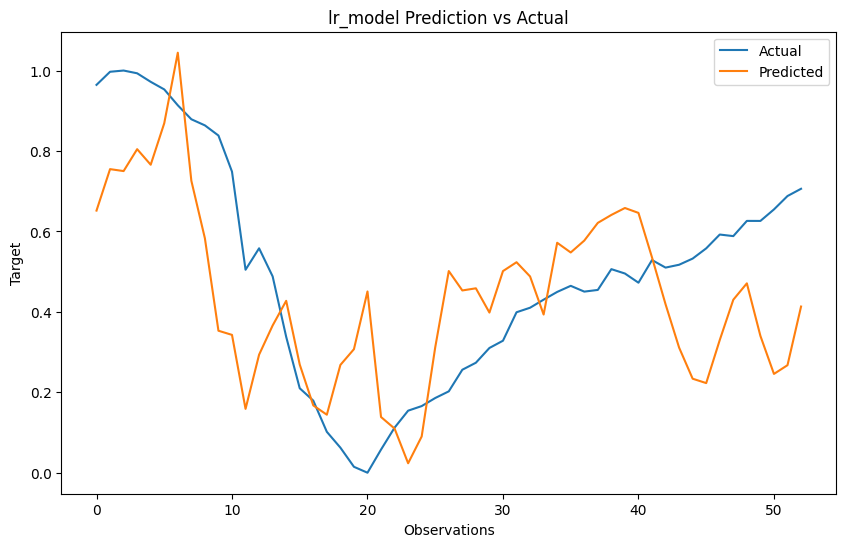

In [58]:
# 线性回归
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 线性回归模型评估
lr_mse, lr_rmse, lr_r2 = evaluate_model(lr_model, X_test, y_test)
print("Linear Regression - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(lr_mse, lr_rmse, lr_r2))
model_evaluation(lr_model,'lr_model',X_combined,y_combined)

Random Forest - MSE: 0.0281, RMSE: 0.1677, R2: -5.8977


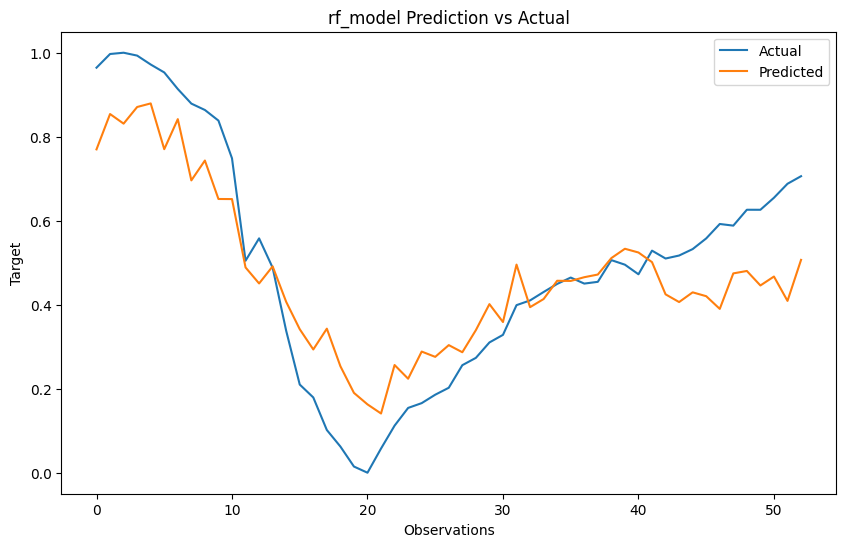

In [59]:
# 随机森林
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
# 随机森林模型评估
rf_mse, rf_rmse, rf_r2 = evaluate_model(rf_model, X_test, y_test)
print("Random Forest - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(rf_mse, rf_rmse, rf_r2))
model_evaluation(rf_model,'rf_model',X_combined,y_combined)

Epoch 1/40
5/5 [==============================] - 1s 4ms/step - loss: 0.2220
Epoch 2/40
5/5 [==============================] - 0s 4ms/step - loss: 0.1259
Epoch 3/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0950
Epoch 4/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0875
Epoch 5/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0960
Epoch 6/40
5/5 [==============================] - 0s 4ms/step - loss: 0.0948
Epoch 7/40
5/5 [==============================] - 0s 4ms/step - loss: 0.0732
Epoch 8/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0830
Epoch 9/40
5/5 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 10/40
5/5 [==============================] - 0s 2ms/step - loss: 0.1030
Epoch 11/40
5/5 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 12/40
5/5 [==============================] - 0s 4ms/step - loss: 0.0810
Epoch 13/40
5/5 [==============================] - 0s 3ms/step - loss: 0.

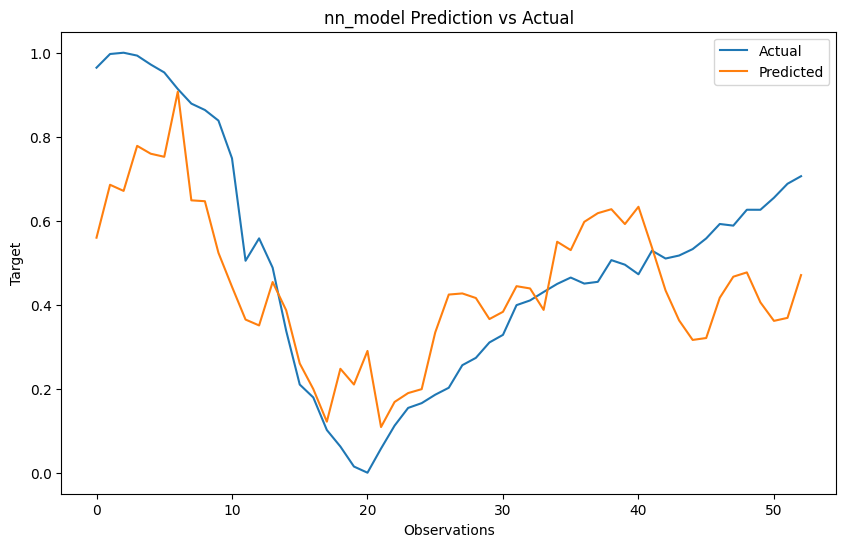

In [60]:
# 简单神经网络
nn_model = Sequential()
nn_model.add(Dense(200, input_dim=n_months, activation='relu'))
nn_model.add(Dense(50,activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=40, batch_size=10)

# 神经网络模型评估
nn_mse, nn_rmse, nn_r2 = evaluate_model(nn_model, X_test, y_test)
print("Neural Network - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(nn_mse, nn_rmse, nn_r2))
model_evaluation(nn_model,'nn_model',X_combined,y_combined)

In [61]:
# 硬着头皮试一下RNN,lstm 和 GRU
# 重塑数据以适应 RNN, LSTM, GRU 模型
X_train_rnn = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# 合并 X_rnn训练集和 X_rnn 测试集
X_combined_rnn = np.vstack((X_train_rnn, X_test_rnn))
X_train_rnn.shape

(42, 1, 12)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
import matplotlib.pyplot as plt

def plt_history(history):
    # 绘制训练损失和验证损失
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

Epoch 1/30
2/2 [==============================] - 1s 6ms/step - loss: 0.1427
Epoch 2/30
2/2 [==============================] - 0s 5ms/step - loss: 0.1139
Epoch 3/30
2/2 [==============================] - 0s 8ms/step - loss: 0.0933
Epoch 4/30
2/2 [==============================] - 0s 12ms/step - loss: 0.0822
Epoch 5/30
2/2 [==============================] - 0s 10ms/step - loss: 0.0815
Epoch 6/30
2/2 [==============================] - 0s 7ms/step - loss: 0.0815
Epoch 7/30
2/2 [==============================] - 0s 10ms/step - loss: 0.0823
Epoch 8/30
2/2 [==============================] - 0s 10ms/step - loss: 0.0820
Epoch 9/30
2/2 [==============================] - 0s 8ms/step - loss: 0.0807
Epoch 10/30
2/2 [==============================] - 0s 10ms/step - loss: 0.0792
Epoch 11/30
2/2 [==============================] - 0s 8ms/step - loss: 0.0768
Epoch 12/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 13/30
2/2 [==============================] - 0s 6ms/step - los

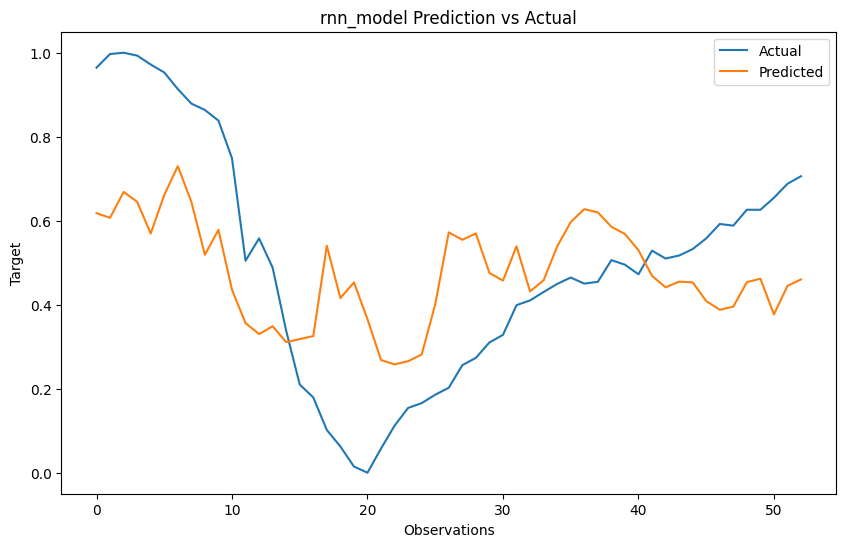

In [63]:
# 定义 RNN 模型
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# 训练 RNN 模型
# 假设使用的是 LSTM 模型
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=30, batch_size=32)
# plt_history(rnn_history)
# rnn模型评估
rnn_mse, rnn_rmse, rnn_r2 = evaluate_model(rnn_model, X_test_rnn, y_test)
print("RNN - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(rnn_mse, rnn_rmse, rnn_r2))
model_evaluation(rnn_model,'rnn_model',X_combined_rnn,y_combined)

Epoch 1/30
2/2 [==============================] - 2s 5ms/step - loss: 0.4957
Epoch 2/30
2/2 [==============================] - 0s 7ms/step - loss: 0.4418
Epoch 3/30
2/2 [==============================] - 0s 5ms/step - loss: 0.3940
Epoch 4/30
2/2 [==============================] - 0s 6ms/step - loss: 0.3494
Epoch 5/30
2/2 [==============================] - 0s 8ms/step - loss: 0.3078
Epoch 6/30
2/2 [==============================] - 0s 5ms/step - loss: 0.2726
Epoch 7/30
2/2 [==============================] - 0s 6ms/step - loss: 0.2392
Epoch 8/30
2/2 [==============================] - 0s 8ms/step - loss: 0.2076
Epoch 9/30
2/2 [==============================] - 0s 5ms/step - loss: 0.1816
Epoch 10/30
2/2 [==============================] - 0s 4ms/step - loss: 0.1575
Epoch 11/30
2/2 [==============================] - 0s 5ms/step - loss: 0.1349
Epoch 12/30
2/2 [==============================] - 0s 8ms/step - loss: 0.1179
Epoch 13/30
2/2 [==============================] - 0s 11ms/step - loss: 0

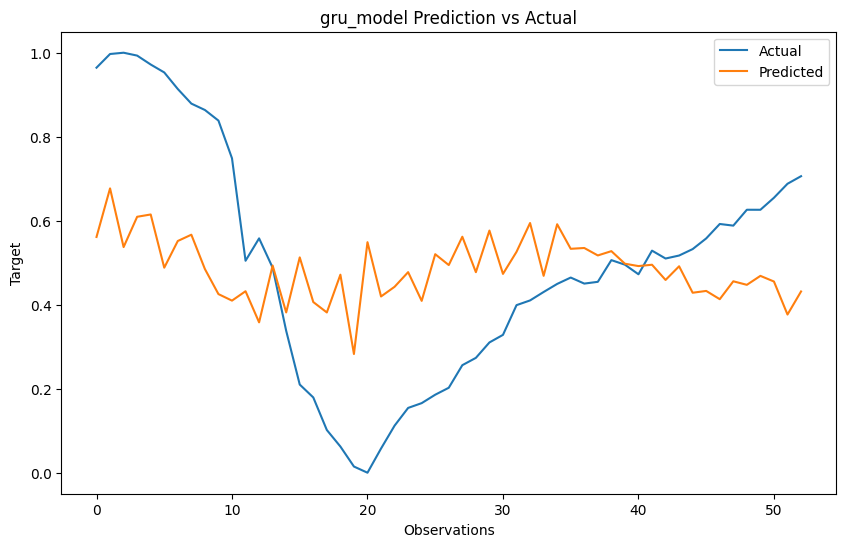

In [64]:

# 定义 GRU 模型
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# 训练 GRU 模型
# 训练 LSTM 模型
GRU_history = gru_model.fit(X_train_rnn, y_train, epochs=30, batch_size=32)
# plt_history(GRU_history)

# GRU模型评估
gru_mse, gru_rmse, gru_r2 = evaluate_model(gru_model, X_test_rnn, y_test)
print("GRU - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(gru_mse, gru_rmse, gru_r2))
model_evaluation(gru_model,'gru_model',X_combined_rnn,y_combined)

Epoch 1/50
2/2 [==============================] - 2s 6ms/step - loss: 0.3140
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 0.2893
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2650
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2426
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2220
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2026
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1849
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1672
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1522
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1381
Epoch 11/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1255
Epoch 12/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1131
Epoch 13/50
2/2 [==============================] - 0s 6ms/step - loss: 0.

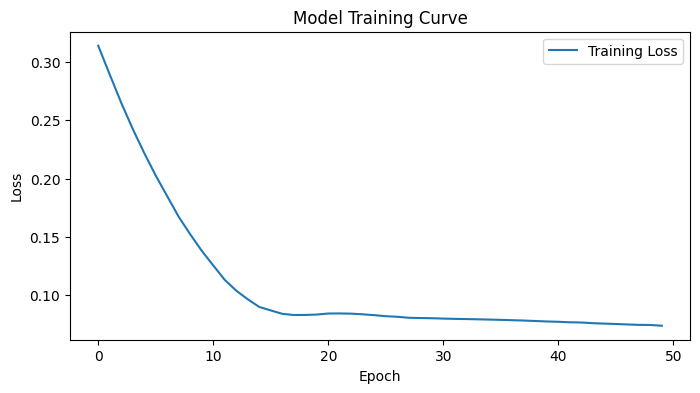

1/1 [==============================] - 0s 206ms/step
LSTM - MSE: 0.0415, RMSE: 0.2038, R2: -9.1940
2/2 [==============================] - 0s 6ms/step


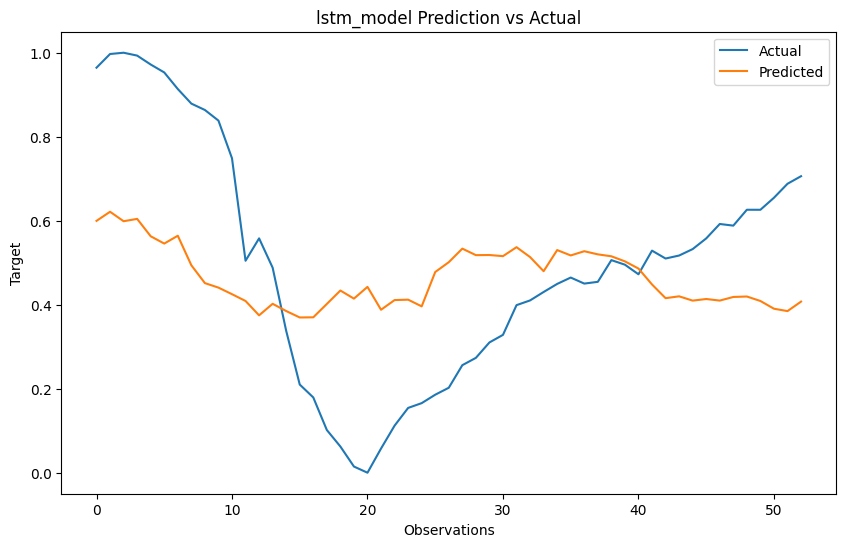

In [65]:
# 定义 LSTM 模型
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
# 训练 LSTM 模型
lstm_history = lstm_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32)
plt_history(lstm_history)
# lstm模型评估
lstm_mse, lstm_rmse, lstm_r2 = evaluate_model(lstm_model, X_test_rnn, y_test)
print("LSTM - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(lstm_mse, lstm_rmse, lstm_r2))
model_evaluation(lstm_model,'lstm_model',X_combined_rnn,y_combined)